In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os 
import sys
sys.path.append('/home/kalkiek/projects/reddit-political-affiliation/')

import itertools
import random
from tqdm.notebook import tqdm
from collections import defaultdict
from sklearn.metrics import accuracy_score

#from src.data.make_dataset import build_dataset
#from src.models.word2vec.User2Subreddit import User2Subreddit

from sklearn.metrics import auc, roc_curve
#from src.data.SubredditUserDataset import SubredditUserDataset
from src.features.interactions.political_comment import PoliticalComment
import bz2
import lzma
import json
#import zstandard as zstd
from json import JSONDecodeError
from collections import Counter
import math
import pandas as pd
from matplotlib import pyplot as plt
import glob
from tqdm import tqdm
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [3]:
X_path='user_subreddit_matrix_X.npy'
Y_path='user_subreddit_matrix_Y.npy'
user_path='user_subreddit_matrix_username.npy'
X_reduced_path='user_subreddit_reduced.npy'
X_embedded_path='user_subreddit_embedded_60_4.npy'

In [4]:
X=np.load(X_path,allow_pickle=True)
Y=np.load(Y_path,allow_pickle=True)
X_reduced=np.load(X_reduced_path)
X_embedded=np.load(X_embedded_path)

In [5]:
X_idx=np.flatnonzero(X.sum(1) >=5)
X=X[X_idx,:]
Y=Y[X_idx,:]
#user_name=user_name[X_idx]

In [9]:
for row in Y:
    if row[0]=='gold':
        row[0]='self-declaration'
    if row[1]=='Democrat':
        row[1]='Liberal'
    if row[1]=='Republican':
        row[1]='Conservative'

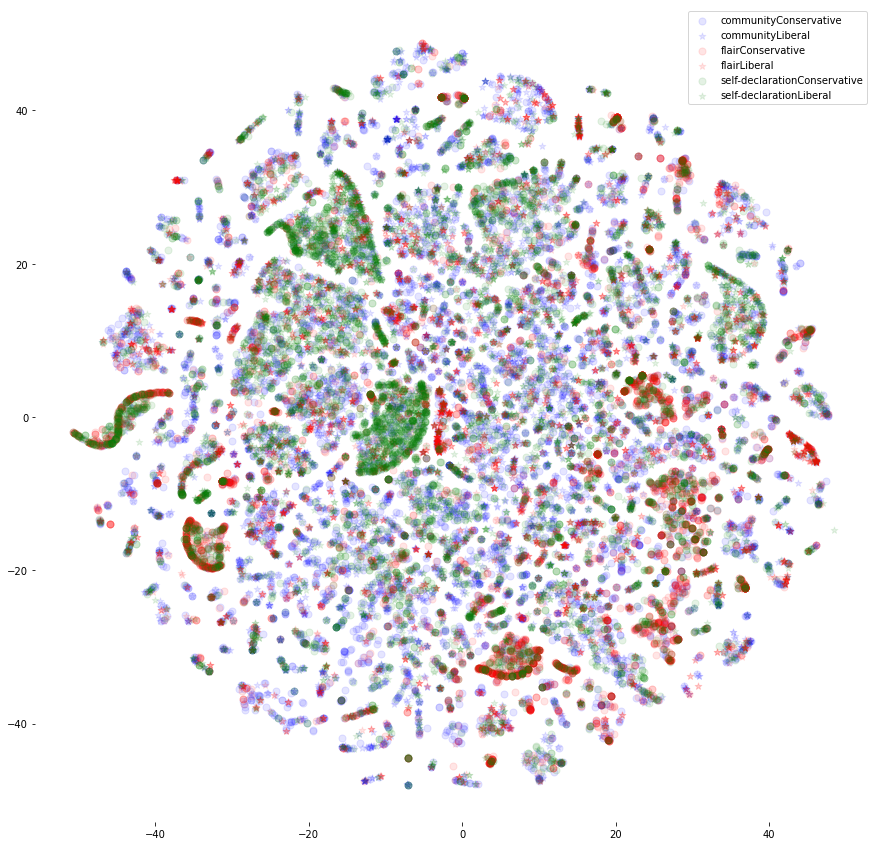

In [12]:
import matplotlib.pyplot as plt
import numpy as  np

#fig, ax = plt.subplots()
fig = figure(figsize=(15, 15))
ax = axes(frameon=False)
colors={'community':"blue",'flair':"red",'self-declaration':"green"}
markers={'Liberal':'*','Conservative':'o'}
source = Y[:,0]
politics=Y[:,1]
for sidx,s in enumerate(np.unique(source)):
    for p in np.unique(politics):
        if 1:#s =='flair':
            #i = np.where(source==s) 
            
            i = np.where(np.logical_and(source==s, politics==p))
            i = np.random.choice(i[0], 5000)
            
            #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s,marker='x')
            #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s+p,marker='x')
            ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label=s+p, s=50, color=colors[s],marker=markers[p],alpha=0.10)
ax.legend()
plt.savefig('../bad_actors/bad_actors_flip_counts/plots/all-level-tsne-60-4.pdf', dpi=300,facecolor='w',bbox_inches='tight')
plt.show()


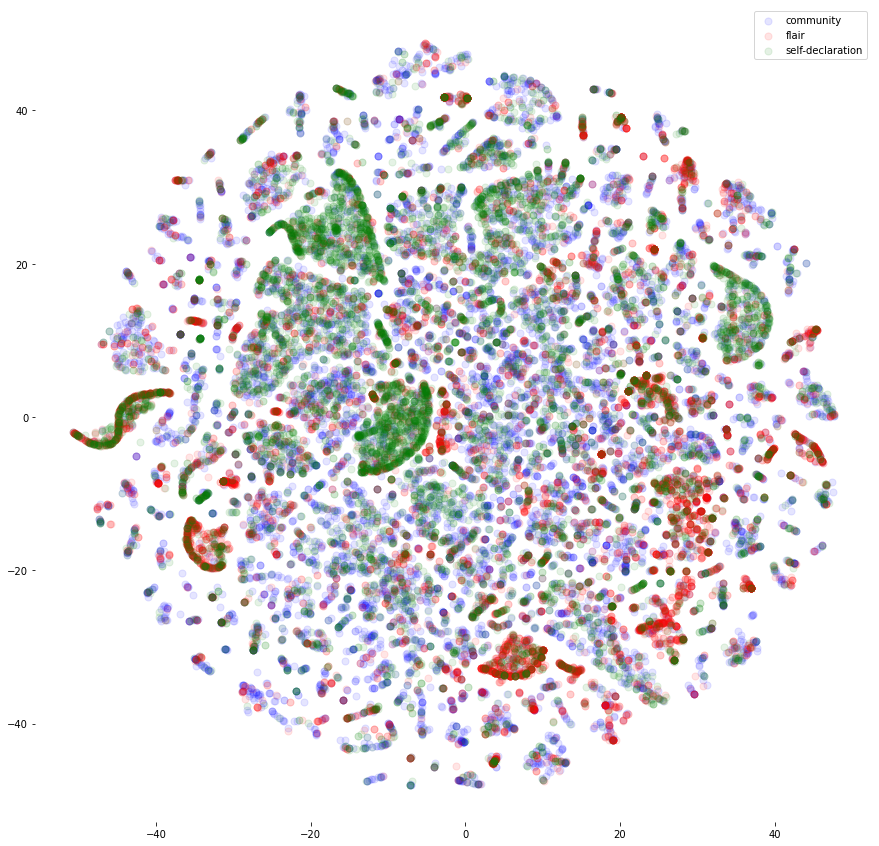

In [13]:
import matplotlib.pyplot as plt
import numpy as  np

#fig, ax = plt.subplots()
fig = figure(figsize=(15, 15))
ax = axes(frameon=False)
# scatter_x = np.array([1,2,3,4,5])
# scatter_y = np.array([5,4,3,2,1])
colors=["blue","red","green"]
source = Y[:,0]
politics=Y[:,1]
for sidx,s in enumerate(np.unique(source)):
    #for p in np.unique(politics):
        if 1:#s =='flair':
            i = np.where(source==s) 
            
            #i = np.where(np.logical_and(source==s, politics==p))
            i = np.random.choice(i[0], 10000)
            
            #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s,marker='x')
            #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s+p,marker='x')
            ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label=s, s=50, color=colors[sidx],alpha=0.10)
ax.legend()
plt.savefig('../bad_actors/bad_actors_flip_counts/plots/dataset-level-tsne-60-4.pdf', dpi=300,facecolor='w',bbox_inches='tight')
plt.show()


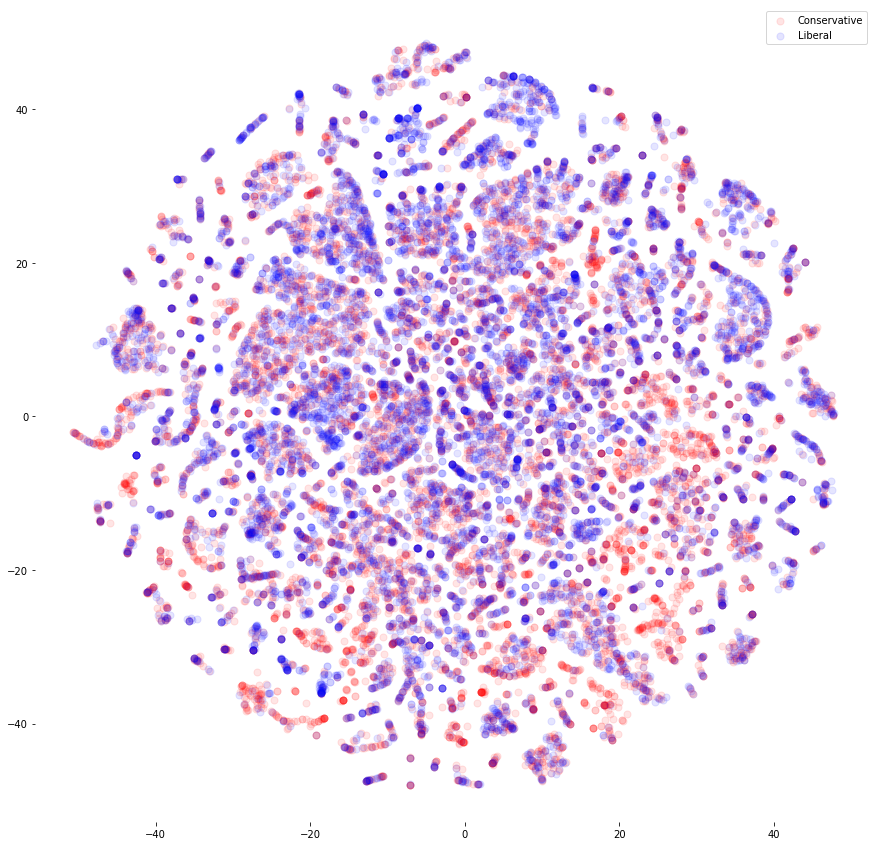

In [19]:
import matplotlib.pyplot as plt
import numpy as  np

#fig, ax = plt.subplots()
fig = figure(figsize=(15, 15))
ax = axes(frameon=False)
# scatter_x = np.array([1,2,3,4,5])
# scatter_y = np.array([5,4,3,2,1])
colors=["red","blue"]
markers={'Liberal':'o','Conservative':'o'}
source = Y[:,0]
politics=Y[:,1]
for pidx,p in enumerate(np.unique(politics)):
    if 1:#s =='flair':
        i = np.where(politics==p) 

        #i = np.where(np.logical_and(source==s, politics==p))
        i = np.random.choice(i[0], 10000)

        #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s,marker='x')
        #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s+p,marker='x')
        ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label=p, s=50, color=colors[pidx],marker=markers[p],alpha=0.1)
ax.legend()
plt.savefig('../bad_actors/bad_actors_flip_counts/plots/politics-level-tsne-60-4.pdf', dpi=300,facecolor='w',bbox_inches='tight')
plt.show()


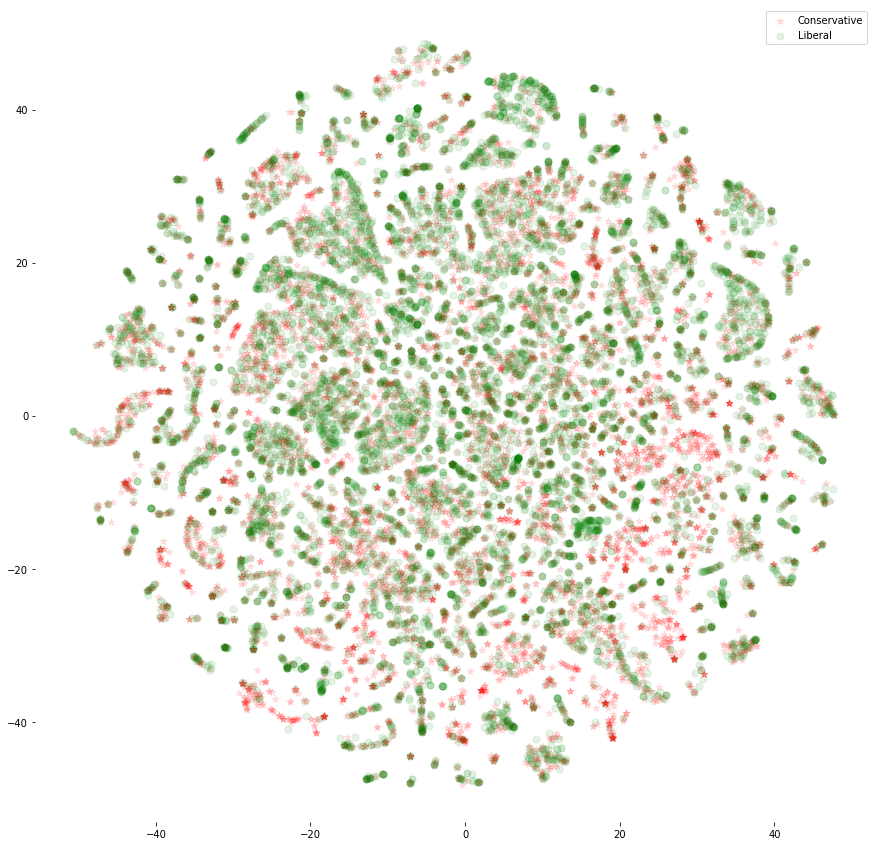

In [18]:
import matplotlib.pyplot as plt
import numpy as  np

#fig, ax = plt.subplots()
fig = figure(figsize=(15, 15))
ax = axes(frameon=False)
# scatter_x = np.array([1,2,3,4,5])
# scatter_y = np.array([5,4,3,2,1])
colors=["red","green"]
markers={'Liberal':'o','Conservative':'*'}
source = Y[:,0]
politics=Y[:,1]
for pidx,p in enumerate(np.unique(politics)):
    if 1:#s =='flair':
        i = np.where(politics==p) 

        #i = np.where(np.logical_and(source==s, politics==p))
        i = np.random.choice(i[0], 10000)

        #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s,marker='x')
        #ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label= s+p,marker='x')
        ax.scatter(X_embedded[:, 0][i], X_embedded[:, 1][i], label=p, s=50, color=colors[pidx],marker=markers[p],alpha=0.1)
ax.legend()
plt.savefig('../bad_actors/bad_actors_flip_counts/plots/politics-level-shape-tsne-60-4.pdf', dpi=300,facecolor='w',bbox_inches='tight')
plt.show()